# Naive Bayes Classifier Algorithm

- Naive Bayes algorithm is a supervised learning algorithm, which is based on "Bayes theorem" and used for
  solving classification problems.
    
- it is mainly used in text classification that includes a high-dimensional training datasset.

- Naive Bayes classifier is one of the simple and most effective classification algorithms which helps in building 
  the fast machine learning models that can make quick predictions.
    
- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

- Some popular examples of Naive Bayes Algorithm are " spam filtration, Sentimental analysis, and classifying articles". 

## Why is it called ' Naive Bayes ' ?

The Naive Bayes algorithm is comprised of two words "Naive" and "Bayes", which can be described as:
       
   #### - Naive:
    
   It is called 'Naive' because it assumes that the occurance of a certain feature is independent of the occurance
   of other features. Such as if the fruit is identified on the bases of color, shape, and taste means red, spherical,
   and sweet fruit is recognized as an apple without depending on each other.
             
   #### - Bayes:    
    
   It is called 'Bayes' because it depends on the principle of "Bayes Theorem".

## Bayes' Theorem:

- Bayes' Theorem is also known as "Bayes' Rule" or "Bayess' Law", which is used to determine the probability of a
  hypothesis with prior knowledge. I t depends on the conditional probability.
    
- The formula Bayes Theorem is given as:
 

<img src="https://miro.medium.com/max/792/1*9lA2z-Yz254sXCyHqYMoeQ.png"/>

## Types of Naive Bayes Model:

 There are three types of Naive Bayes model, which are given below:
 
#### 1.Bernoulli:

 It assumes that all our features are binary such that they take only two values. Means '0s' can represent "word does not
 occur in the document" and '1s' as "word occuresin the document".
 
 
#### 2. Mulitinomial Naive Bayes:

 It is used when we have 'discrete data(e.g. movie ratings ranging 1 and 5 as each rating will have certain 'frequency' to
 represent). In text learning we have the count of each word to predict the class or label.
 

#### 3. Gaussian Naive Bayes:

 Because of the assumption of the 'normal distribution', Gaussian Naive Bayes is used in cases when all our features are
 'continuous'. For example in iris dataset features are sepal width, petal width, sepal length, petal length. So its features 
 can have different values in dataset as width and length can vary. We can't representfeatures in terms of their occurances.
 This means data is continuous. Hence we use Naive Bayes here.
 

## Advantages of Naive Bayes Classifier:

- Naive Bayes is one of the fast and easy ML algorithms to predict a class of datasets.

- It can be used for Binary as well as Multi-class Classifications.

- I t performs well in Multi-class predictions as compared to the other Algorithms.

- It is the most popular choice for 'Text classification problems'.


## Disadvantages of Naive Bayes Classifier:

- Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between
  features.

## Applications of Naive Bayes Classifier:

- It is used for Credit Scoring.


- It is used in Medical data classification.


- It can be used in Real-time predictionns because Naive Bayes classifier is an eager learner.


- It is used in Text classification such as Spam filtering and Sentimental analysis.

### Here I used email dataset to perform Naive Bayes classifier.

In [1]:
# import required libraries..

import numpy as np
import pandas as pd

In [2]:
# load the dataset..

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# to findout the how many spam and ham massages are present..

df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
# give the binary value to the msgs to create one new column..

df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
# train and test the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2, random_state=42)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

In [7]:
# convert text data into binary using countvictorizer..

v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
# fit the model..

model1.fit(x_train_count,y_train)

MultinomialNB()

In [9]:
# convert the text data into binary 0 for ham and 1 for spam..

emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model1.predict(emails_count)

array([0, 1], dtype=int64)

In [10]:
# find the accuracy of the model..

x_test_count = v.transform(x_test)
model1.score(x_test_count, y_test)

0.9919282511210762

In [11]:
y_pred = model1.predict(x_test_count)

In [12]:
# accuracy score..

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9919282511210762

In [24]:
# confusion matrix..

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[966,   0],
       [  9, 140]], dtype=int64)

In [25]:
# classification report..

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



Text(60.0, 0.5, 'True')

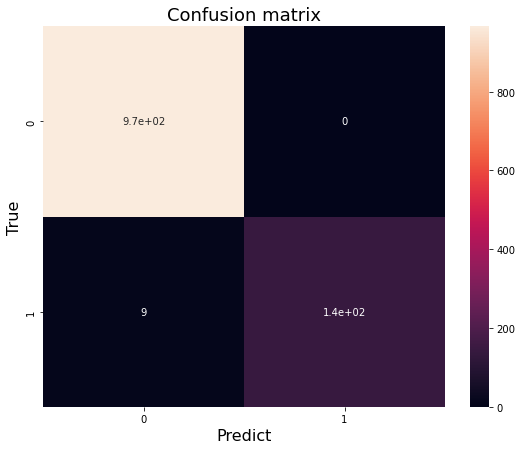

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix',size=18)
plt.xlabel('Predict',size=16)
plt.ylabel('True',size=16)